In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [25]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [26]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [27]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
cad_jpy_df['Return'] = cad_jpy_df['Price'].pct_change()*100
# In this case, you may have to replace inf, -inf values with np.nan"s
cad_jpy_df.replace(('inf', '-inf'), np.nan)
cad_jpy_df = cad_jpy_df.dropna()

### Lagged Returns 

In [45]:
# Create a lagged return using the shift function
cad_jpy_df['Lagged_Return'] = cad_jpy_df.Return.shift()
cad_jpy_df = cad_jpy_df.dropna()

### Train Test Split

In [61]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [62]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
x_train = train["Lagged_Return"].to_frame()
x_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [63]:
# Preview the X_train data
x_train

,Lagged_Return
Date,
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
1990-01-11,0.567546
...,...
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693


# Linear Regression Model

In [65]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(x_train,y_train)
model

LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [74]:
# Make a prediction of "y" values using just the test dataset
predicted_y_values = model.predict(x_test)
len(predicted_y_values)

634

In [75]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predicted_y_values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E046419F10>,
      dtype=object)

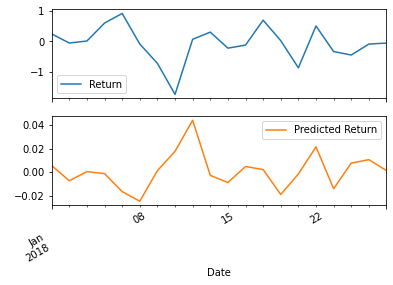

In [76]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [86]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
mse = mean_squared_error(y_test, predicted_y_values)
print(f"Mean Squared Error (MSE): {mse}")

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (RMSE): 0.4154690624952009
Root Mean Squared Error (RMSE): 0.6445688966240931


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [87]:
# Construct a dataframe using just the "y" training data:
Results_2 = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
Results_2["In-sample Predictions"] = model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    Results_2["Return"],
    Results_2["In-sample Predictions"]
)
print(f"In-sample Mean Squared Error (MSE): {in_sample_mse}")

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Mean Squared Error (MSE): 0.7087480853083534
In-sample Root Mean Squared Error (RMSE): 0.8418717748614414


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE

In [ ]:
Root Mean Square Error (RMSE) is the standard deviation of the residuals of a model. The higher the RMSE the worse the data fits. Therefore it can be seen that the out of sample data fits bettwer than the in-sample.